In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Vamos a hacer un **EDA** sobre un conjunto de datos que trata sobre hongos descritos en términos de características físicas; **``clasificación``**: **venenosa** o **comestible**


Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos branquiales de la familia Agaricus y Lepiota (pp. 500-525). 

Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se combinó con la venenosa.

La Guía establece claramente que no existe una regla simple para determinar la comestibilidad de un hongo; no hay reglas como ''folletos tres, déjalo ser'' para Poisonous Oak and Ivy.

Estos datos fueron recogidos a través del siguiente enlace https://archive.ics.uci.edu/dataset/73/mushroom

### Esta base de datos contiene información sobre cada hongo branquial recogido.


In [2]:
df = pd.read_csv('agaricus-lepiota.data', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### La tabla de valores la utilizaremos para facilitar la lectura de la base de datos que como se puede ver, es un poco confusa.

In [3]:
tabla = pd.read_csv('Tabla_de_valores.csv')
tabla.head(5)

,Característica,Descripción
0,Venenoso,"comestible = e, venenoso = p"
1,Forma de la tapa,"campana = B, cónico = C, convexo = X, plano = ..."
2,Superficie de la tapa,"fibroso = F, ranuras = G, escamosas = Y, lisas..."
3,Color de la gorra,"marrón = n, buff = b, canela = c, gris = g, ve..."
4,Moretones,"moretones = t, no = f"


### Lo que haremos ahora será utilizar la columna de la tabla caracteristicas para que sea cada columna de la base de datos

In [4]:
df.columns = tabla['Característica'].tolist()
df.head(5)

,Venenoso,Forma de la tapa,Superficie de la tapa,Color de la gorra,Moretones,Olor,Accesorio branquial,Espaciado branquial,Tamaño de la branquia,Color branquial,...,Superficie del tallo debajo del anillo,Color del tallo por encima del anillo,Color del tallo debajo del anillo,Tipo de velo,Color del velo,Número de anillo,Tipo de anillo,Color de impresión de esporas,Población,Hábitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Ahora lo que queremos es que las siglas que están en df sean palabras con sentido, para ello vamos a utilizar la columna Descripción de la tabla de valores. Le haremos unos arreglos también.

In [5]:
# Lo pasamos todo a minúsculas ya que en la tabla hay variaciones que no tenemos en df, así solucionamos un posible problema.
tabla['Descripción'] = tabla['Descripción'].str.lower()

# Separamos los valores de la columna 'Descripción' en listas através de un split()
tabla['Descripción'] = tabla['Descripción'].str.split(',')

# Creamos un diccionario con las descripciones de la tabla, separando cada elemento por '=' para obtener la clave, valor, y quitando los los espacios de cada uno con split()
tabla['Descripción'] = tabla['Descripción'].apply(lambda x: {i.split('=')[0].strip(): i.split('=')[1].strip() for i in x})

# Con esto invertimos los valores de los diccionarios creados ya que están al revés y no sirven para hacer el mapeo sobre el df.
tabla['Descripción'] = tabla['Descripción'].apply(lambda d: {v: k for k, v in d.items()})

# Mostramos el resultado
tabla

,Característica,Descripción
0,Venenoso,"{'e': 'comestible', 'p': 'venenoso'}"
1,Forma de la tapa,"{'b': 'campana', 'c': 'cónico', 'x': 'convexo'..."
2,Superficie de la tapa,"{'f': 'fibroso', 'g': 'ranuras', 'y': 'escamos..."
3,Color de la gorra,"{'n': 'marrón', 'b': 'buff', 'c': 'canela', 'g..."
4,Moretones,"{'t': 'moretones', 'f': 'no'}"
5,Olor,"{'a': 'almendra', 'l': 'anís', 'c': 'creosota'..."
6,Accesorio branquial,"{'a': 'adjunto', 'd': 'descendente', 'f': 'lib..."
7,Espaciado branquial,"{'c': 'cerca', 'w': 'abarrotado', 'd': 'distan..."
8,Tamaño de la branquia,"{'b': 'ancho', 'n': 'estrecho'}"
9,Color branquial,"{'k': 'negro', 'n': 'marrón', 'b': 'buff', 'h'..."


Ahora ya es más sencilo, es aplicar un bucle con la función map() para mapear los valores de la columna 'Descripción' de la tabla sobre el df.

In [6]:
# Hacemos el mapeo de los valores de df con los de la tabla
for column in df.columns:
    df[column] = df[column].map(tabla[tabla['Característica'] == column]['Descripción'].values[0])

In [7]:
df

,Venenoso,Forma de la tapa,Superficie de la tapa,Color de la gorra,Moretones,Olor,Accesorio branquial,Espaciado branquial,Tamaño de la branquia,Color branquial,...,Superficie del tallo debajo del anillo,Color del tallo por encima del anillo,Color del tallo debajo del anillo,Tipo de velo,Color del velo,Número de anillo,Tipo de anillo,Color de impresión de esporas,Población,Hábitat
0,venenoso,convexo,lisas,marrón,moretones,acre,libre,cerca,estrecho,negro,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,disperso,urbano
1,comestible,convexo,lisas,amarillo,moretones,almendra,libre,cerca,ancho,negro,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marrón,numeroso,pastos
2,comestible,campana,lisas,blanco,moretones,anís,libre,cerca,ancho,marrón,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marrón,numeroso,prados
3,venenoso,convexo,escamosas,blanco,moretones,acre,libre,cerca,estrecho,marrón,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,disperso,urbano
4,comestible,convexo,lisas,gris,no,ninguno,libre,abarrotado,ancho,negro,...,liso,blanco,blanco,parcial,blanco,uno,evanescente,marrón,abundante,pastos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,nudoso,lisas,marrón,no,ninguno,adjunto,cerca,ancho,amarillo,...,liso,naranja,naranja,parcial,naranja,uno,colgante,buff,agrupado,hojas
8120,comestible,convexo,lisas,marrón,no,ninguno,adjunto,cerca,ancho,amarillo,...,liso,naranja,naranja,parcial,marrón,uno,colgante,buff,varios,hojas
8121,comestible,plano,lisas,marrón,no,ninguno,adjunto,cerca,ancho,marrón,...,liso,naranja,naranja,parcial,naranja,uno,colgante,buff,agrupado,hojas
8122,venenoso,nudoso,escamosas,marrón,no,pescado,libre,cerca,estrecho,buff,...,sedoso,blanco,blanco,parcial,blanco,uno,evanescente,blanco,varios,hojas


In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

encoding_guide = {}

for col in df.columns:
    df_encoded[col] = le.fit_transform(df[col])
    encoding_guide[col] = dict(zip(le.classes_, le.transform(le.classes_)))

encoding_guide

{'Venenoso': {'comestible': 0, 'venenoso': 1},
 'Forma de la tapa': {'campana': 0,
  'convexo': 1,
  'cónico': 2,
  'hundido': 3,
  'nudoso': 4,
  'plano': 5},
 'Superficie de la tapa': {'escamosas': 0,
  'fibroso': 1,
  'lisas': 2,
  'ranuras': 3},
 'Color de la gorra': {'amarillo': 0,
  'blanco': 1,
  'buff': 2,
  'canela': 3,
  'gris': 4,
  'marrón': 5,
  'púrpura': 6,
  'rojo': 7,
  'rosa': 8,
  'verde': 9},
 'Moretones': {'moretones': 0, 'no': 1},
 'Olor': {'acre': 0,
  'almendra': 1,
  'anís': 2,
  'creosota': 3,
  'foul': 4,
  'mohoso': 5,
  'ninguno': 6,
  'pescado': 7,
  'picante': 8},
 'Accesorio branquial': {'adjunto': 0, 'libre': 1},
 'Espaciado branquial': {'abarrotado': 0, 'cerca': 1},
 'Tamaño de la branquia': {'ancho': 0, 'estrecho': 1},
 'Color branquial': {'amarillo': 0,
  'blanco': 1,
  'buff': 2,
  'chocolate': 3,
  'gris': 4,
  'marrón': 5,
  'naranja': 6,
  'negro': 7,
  'púrpura': 8,
  'rojo': 9,
  'rosa': 10,
  'verde': 11},
 'Forma del tallo': {'agrandamiento':

## Preparamos los datos para hacer una pequeña prueba de ML

In [9]:
df_encoded

,Venenoso,Forma de la tapa,Superficie de la tapa,Color de la gorra,Moretones,Olor,Accesorio branquial,Espaciado branquial,Tamaño de la branquia,Color branquial,...,Superficie del tallo debajo del anillo,Color del tallo por encima del anillo,Color del tallo debajo del anillo,Tipo de velo,Color del velo,Número de anillo,Tipo de anillo,Color de impresión de esporas,Población,Hábitat
0,1,1,2,5,0,0,1,1,1,7,...,2,1,1,0,1,2,0,6,2,6
1,0,1,2,0,0,1,1,1,0,7,...,2,1,1,0,1,2,0,4,3,4
2,0,0,2,1,0,2,1,1,0,5,...,2,1,1,0,1,2,0,4,3,5
3,1,1,0,1,0,0,1,1,1,5,...,2,1,1,0,1,2,0,6,2,6
4,0,1,2,4,1,6,1,0,0,7,...,2,1,1,0,1,2,2,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,2,5,1,6,0,1,0,0,...,2,6,6,0,3,2,0,2,1,3
8120,0,1,2,5,1,6,0,1,0,0,...,2,6,6,0,2,2,0,2,5,3
8121,0,5,2,5,1,6,0,1,0,5,...,2,6,6,0,3,2,0,2,1,3
8122,1,4,0,5,1,7,1,1,1,2,...,3,1,1,0,1,2,2,1,5,3


**``Vemos la correlación entre las distintas columnas de los datos``**

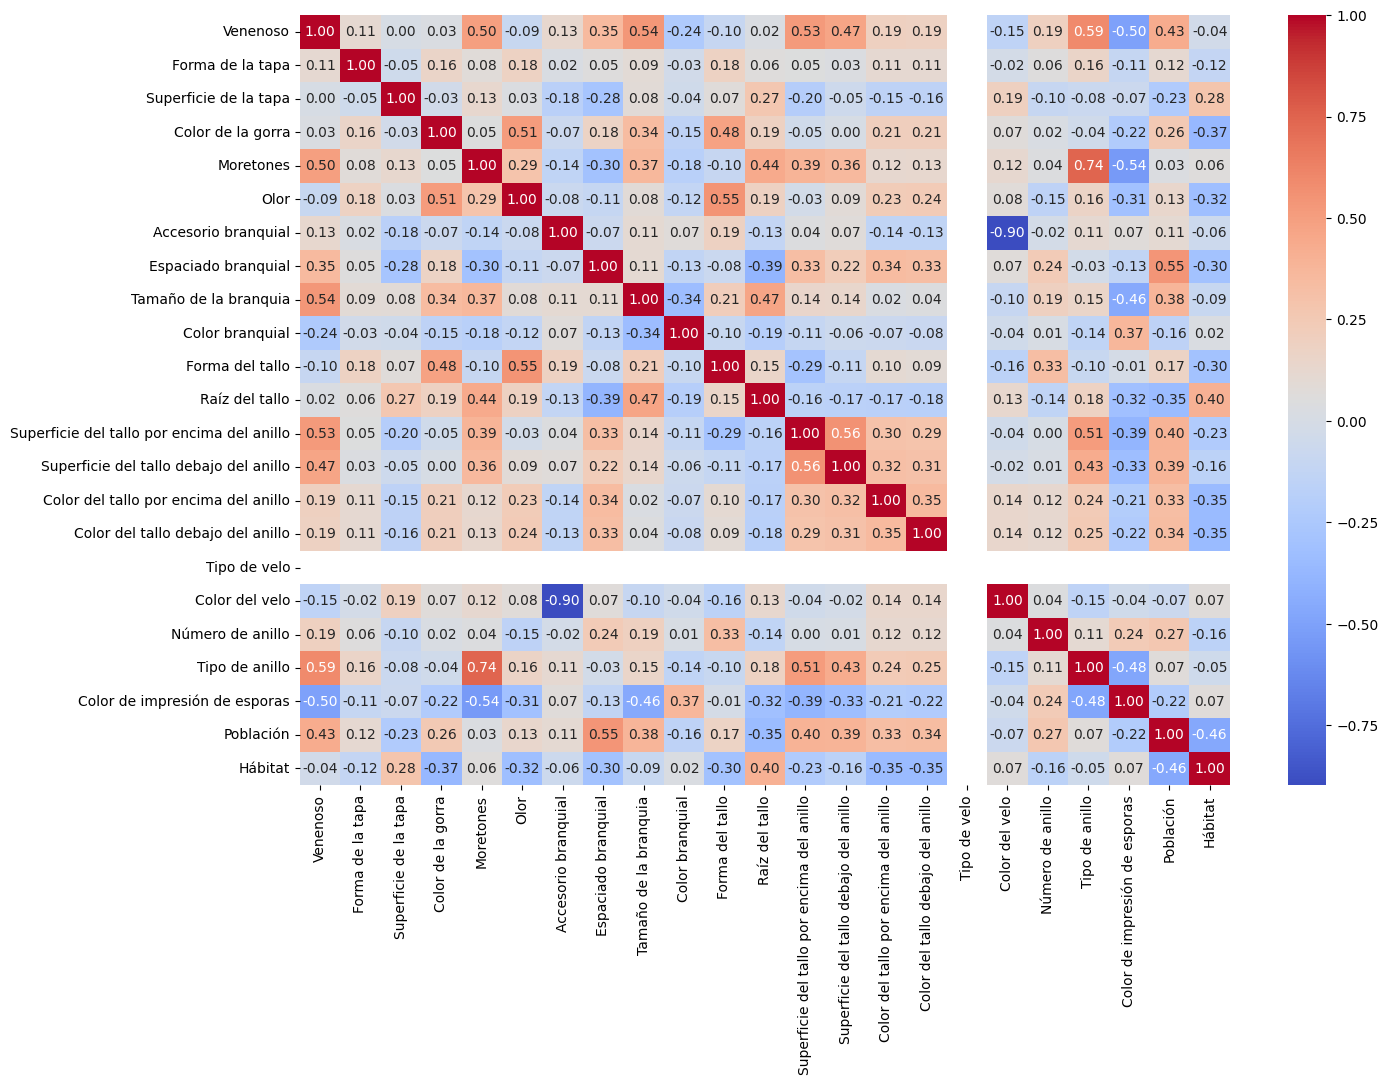

In [10]:
corr = df_encoded.corr()

# Crea un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

## Ahora vamos a hacer unos **``modelos de ML``** para comrpobar **``la probabilidad``** de acertar si es **``venenoso o no``** un hongo

In [11]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

# Métodos de Validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas para Clasificación
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
# Separamos variables para entrenamiento y prueba

X = df_encoded.drop("Venenoso", axis = 1)
y = df_encoded["Venenoso"]

print(f"X: {X.shape}, y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X: (8124, 22), y: (8124,)
X_train: (6499, 22), y_train: (6499,)
X_test: (1625, 22), y_test: (1625,)


In [13]:
# Entrenamos

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Ajusto el radio del modelo RadiusNeighborsClassifier porque el modelo no converge con el valor por defecto

modelos = [KNeighborsClassifier(),
           RadiusNeighborsClassifier(radius=1.0, outlier_label='most_frequent'),
           LogisticRegression(),
           GaussianNB(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           SVC(),
           AdaBoostClassifier(),
           GradientBoostingClassifier()]

In [15]:
datos = list()

for model in modelos:
    
    model.fit(X_train, y_train)
    
    yhat = model.predict(X_test)
    
    jaccard   = jaccard_score(y_test, yhat)
    accuracy  = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall    = recall_score(y_test, yhat)
    f1        = f1_score(y_test, yhat)
    roc_auc   = roc_auc_score(y_test, yhat)
    cm        = confusion_matrix(y_test, yhat)    
    
    datos.append([str(model), model, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model_name", "model", "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]

df_metricas = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas.sort_values("roc_auc", ascending = False)

C:\Users\GUILL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model_name,model,jaccard_index,accuracy,precision,recall,f1,roc_auc,confusion_matrix
4,DecisionTreeClassifier(),DecisionTreeClassifier(),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[[843, 0], [0, 782]]"
5,RandomForestClassifier(),"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[[843, 0], [0, 782]]"
6,SVC(),SVC(),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[[843, 0], [0, 782]]"
7,AdaBoostClassifier(),"(DecisionTreeClassifier(max_depth=1, random_st...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[[843, 0], [0, 782]]"
8,GradientBoostingClassifier(),([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[[843, 0], [0, 782]]"
0,KNeighborsClassifier(),KNeighborsClassifier(),0.998721,0.999385,1.000000,0.998721,0.999360,0.999361,"[[843, 0], [1, 781]]"
2,LogisticRegression(),LogisticRegression(),0.955335,0.977846,0.969773,0.984655,0.977157,0.978092,"[[819, 24], [12, 770]]"
1,RadiusNeighborsClassifier(outlier_label='most_...,RadiusNeighborsClassifier(outlier_label='most_...,0.920716,0.961846,1.000000,0.920716,0.958722,0.960358,"[[843, 0], [62, 720]]"
3,GaussianNB(),GaussianNB(),0.813981,0.903385,0.917223,0.878517,0.897453,0.902485,"[[781, 62], [95, 687]]"


In [18]:
from sklearn.model_selection import cross_val_score

# Elegir el modelo que quieres validar
model = DecisionTreeClassifier()

# Realizar la validación cruzada
scores = cross_val_score(model, X, y, cv=5)

# Imprimir los resultados
print("Puntuaciones de la validación cruzada: ", scores)
print("Media de las puntuaciones de la validación cruzada: ", scores.mean())

Puntuaciones de la validación cruzada:  [0.84246154 1.         1.         1.         0.92610837]
Media de las puntuaciones de la validación cruzada:  0.9537139825691551
